# Advanced Statistics For Physics - Sixth assignment

* **Student:** Faorlin Tommaso
* **ID:** 2021857
* **Course:** Physics of Data

In [1]:
options(tidyveRse.quiet = TRUE)
library(gridExtra)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::combine() masks gridExtra::combine()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()



## Exercise 1 - Poisson process

The mean of the poisson distribution coincides with the rate $\lambda$

### A,B - Plots

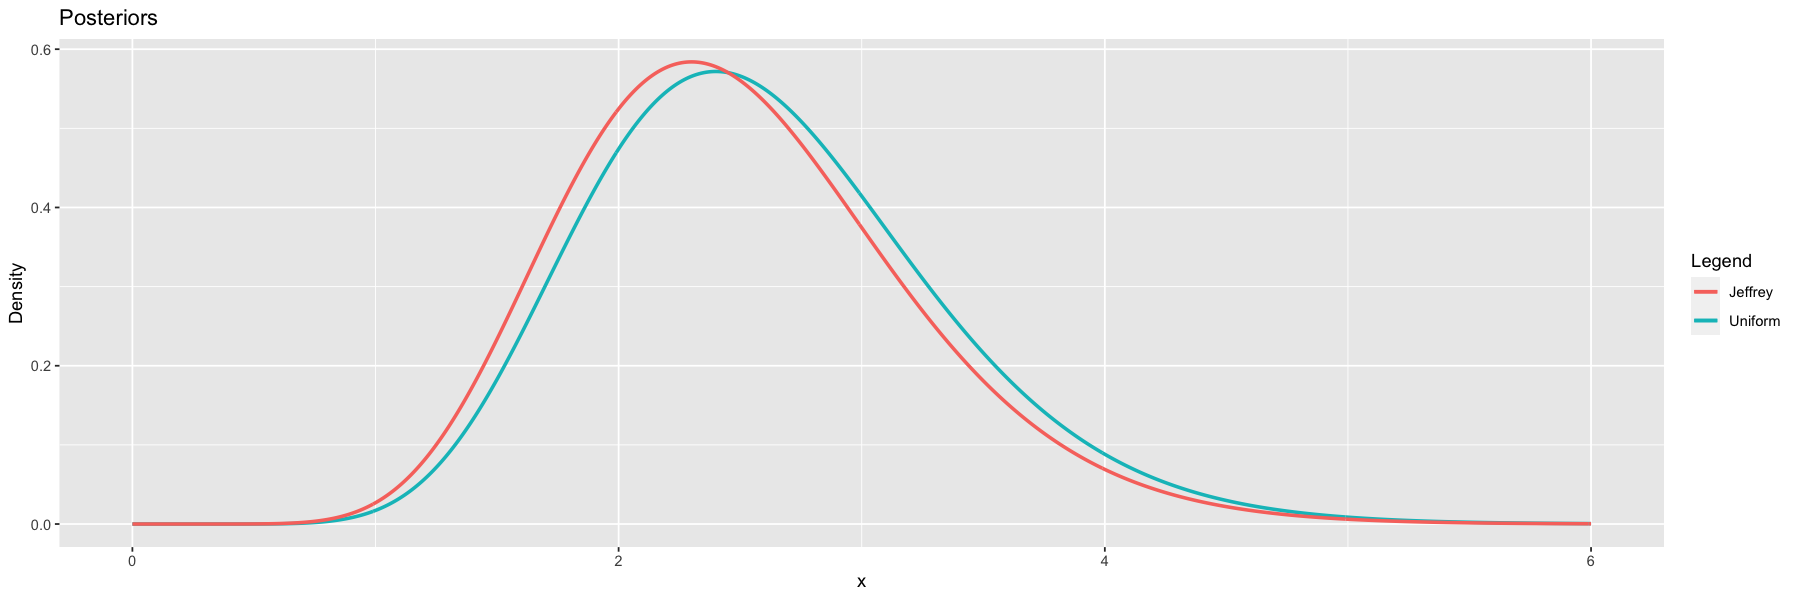

In [2]:
options(repr.plot.width=15, repr.plot.height=5)

particle_observed <- c(4,1,3,1,3)
x <- seq(0,6,0.01)

results <- data.frame(x=x,
                      uni = dgamma(x, sum(particle_observed)+1,length(particle_observed)),
                      jef = dgamma(x, sum(particle_observed)+0.5,length(particle_observed))
                      )

#mean of x, mean of x^ 2 and variance in the case of a uniform prior
uni.meanx<-results$x%*%results$uni*0.01
uni.meanx2<-(results$x*results$x)%*%results$uni*0.01
uni.var <- uni.meanx2-uni.meanx^2

#mean of x, mean of x^ 2 and variance in the case of a Jeffrey's prior
jef.meanx<-results$x%*%results$jef*0.01
jef.meanx2<-(results$x*results$x)%*%results$jef*0.01
jef.var <- jef.meanx2-jef.meanx^2

#numerical medians 
uni.median <- qgamma(0.5, sum(particle_observed)+1,length(particle_observed))
jef.median <- qgamma(0.5, sum(particle_observed)+0.5,length(particle_observed))

#credibility interval in the case of a uniform prior 
unicred.interval.low <- qgamma(0.025, sum(particle_observed)+1,length(particle_observed))
unicred.interval.high <- qgamma(0.975, sum(particle_observed)+1,length(particle_observed))

#credibility interval in the case of a Jeffrey's prior
jefcred.interval.low <- qgamma(0.025, sum(particle_observed)+0.5,length(particle_observed))
jefcred.interval.high <- qgamma(0.975, sum(particle_observed)+0.5,length(particle_observed))

#credibility interval for a gaussian centered in the mean and sigma given in the case of a uniform prior
uninorcred.interval.low <- qnorm(0.025, uni.meanx, sqrt(uni.var))
uninorcred.interval.high <- qnorm(0.975, uni.meanx,sqrt(uni.var))

#credibility interval for a gaussian centered in the mean and sigma given in the case of a Jeffrey's prior
jefnorcred.interval.low <- qnorm(0.025, jef.meanx, sqrt(jef.var))
jefnorcred.interval.high <- qnorm(0.975, jef.meanx,sqrt(jef.var))

ggplot(data=results) +
geom_line(aes(x=x, y=uni, colour='Uniform'), size=1) + 
geom_line(aes(x=x, y=jef, colour='Jeffrey'), size=1) + 
ggtitle('Posteriors')+
labs(x='x', y='Density', colour='Legend')

### A,B,C - Evaluations

To calculate the analytical mean and variance for the obtained posterior Gamma distribution I know that $$\mu=\frac{\alpha}{\beta}\,\,\,\,\,\,\,\,\,\sigma=\frac{\alpha}{\beta^2}$$
The Gamma distribution does not admit a simple analyitical form for the median, so I will limit myself to obtain the median only numerically.

In [3]:
print('============================| Uniform prior |============================')
print(paste('Analytical mean:', (sum(particle_observed)+1)/(length(particle_observed)) ))
print(paste('Analytical variance:',(sum(particle_observed)+1)/(length(particle_observed)^2) ))
print('-----------------------------')
print(paste('R\'s mean:',round(as.numeric(uni.meanx),3)))
print(paste('R\'s variance:',round(as.numeric(uni.var),3)))
print(paste('R\'s median:',round(as.numeric(uni.median),3)))
print(paste('The 95% credibility interval is:',paste0('[',round(unicred.interval.low,2),',',round(unicred.interval.high,2),']')))
print(paste('For a gaussian approximation, the 95% credibility interval is:',paste0('[',round(uninorcred.interval.low,2),',',round(uninorcred.interval.high,2),']')))
print('-----------------------------')
print('============================| Jeffrey\'s prior |============================')
print(paste('Analytical mean:', (sum(particle_observed)+0.5)/(length(particle_observed)) ))
print(paste('Analytical variance:',(sum(particle_observed)+0.5)/(length(particle_observed)^2) ))
print('-----------------------------')
print(paste('R\'s mean:',round(as.numeric(jef.meanx),3)))
print(paste('R\'s variance:',round(as.numeric(jef.var),3)))
print(paste('R\'s median:',round(as.numeric(jef.median),3)))
print('-----------------------------')
print(paste('The 95% credibility interval is:',paste0('[',round(jefcred.interval.low,2),',',round(jefcred.interval.high,2),']')))
print(paste('For a gaussian approximation, the 95% credibility interval is:',paste0('[',round(jefnorcred.interval.low,2),',',round(jefnorcred.interval.high,2),']')))

[1] "============================| Uniform prior |============================"
[1] "Analytical mean: 2.6"
[1] "Analytical variance: 0.52"
[1] "-----------------------------"
[1] "R's mean: 2.599"
[1] "R's variance: 0.519"
[1] "R's median: 2.534"
[1] "The 95% credibility interval is: [1.38,4.19]"
[1] "For a gaussian approximation, the 95% credibility interval is: [1.19,4.01]"
[1] "-----------------------------"
[1] "============================| Jeffrey's prior |============================"
[1] "Analytical mean: 2.5"
[1] "Analytical variance: 0.5"
[1] "-----------------------------"
[1] "R's mean: 2.499"
[1] "R's variance: 0.499"
[1] "R's median: 2.434"
[1] "-----------------------------"
[1] "The 95% credibility interval is: [1.31,4.06]"
[1] "For a gaussian approximation, the 95% credibility interval is: [1.11,3.88]"


## Exercise 2 - The Lighthouse Problem

I place the lightouse at $\alpha.true=52$ and $\beta.true=30$.

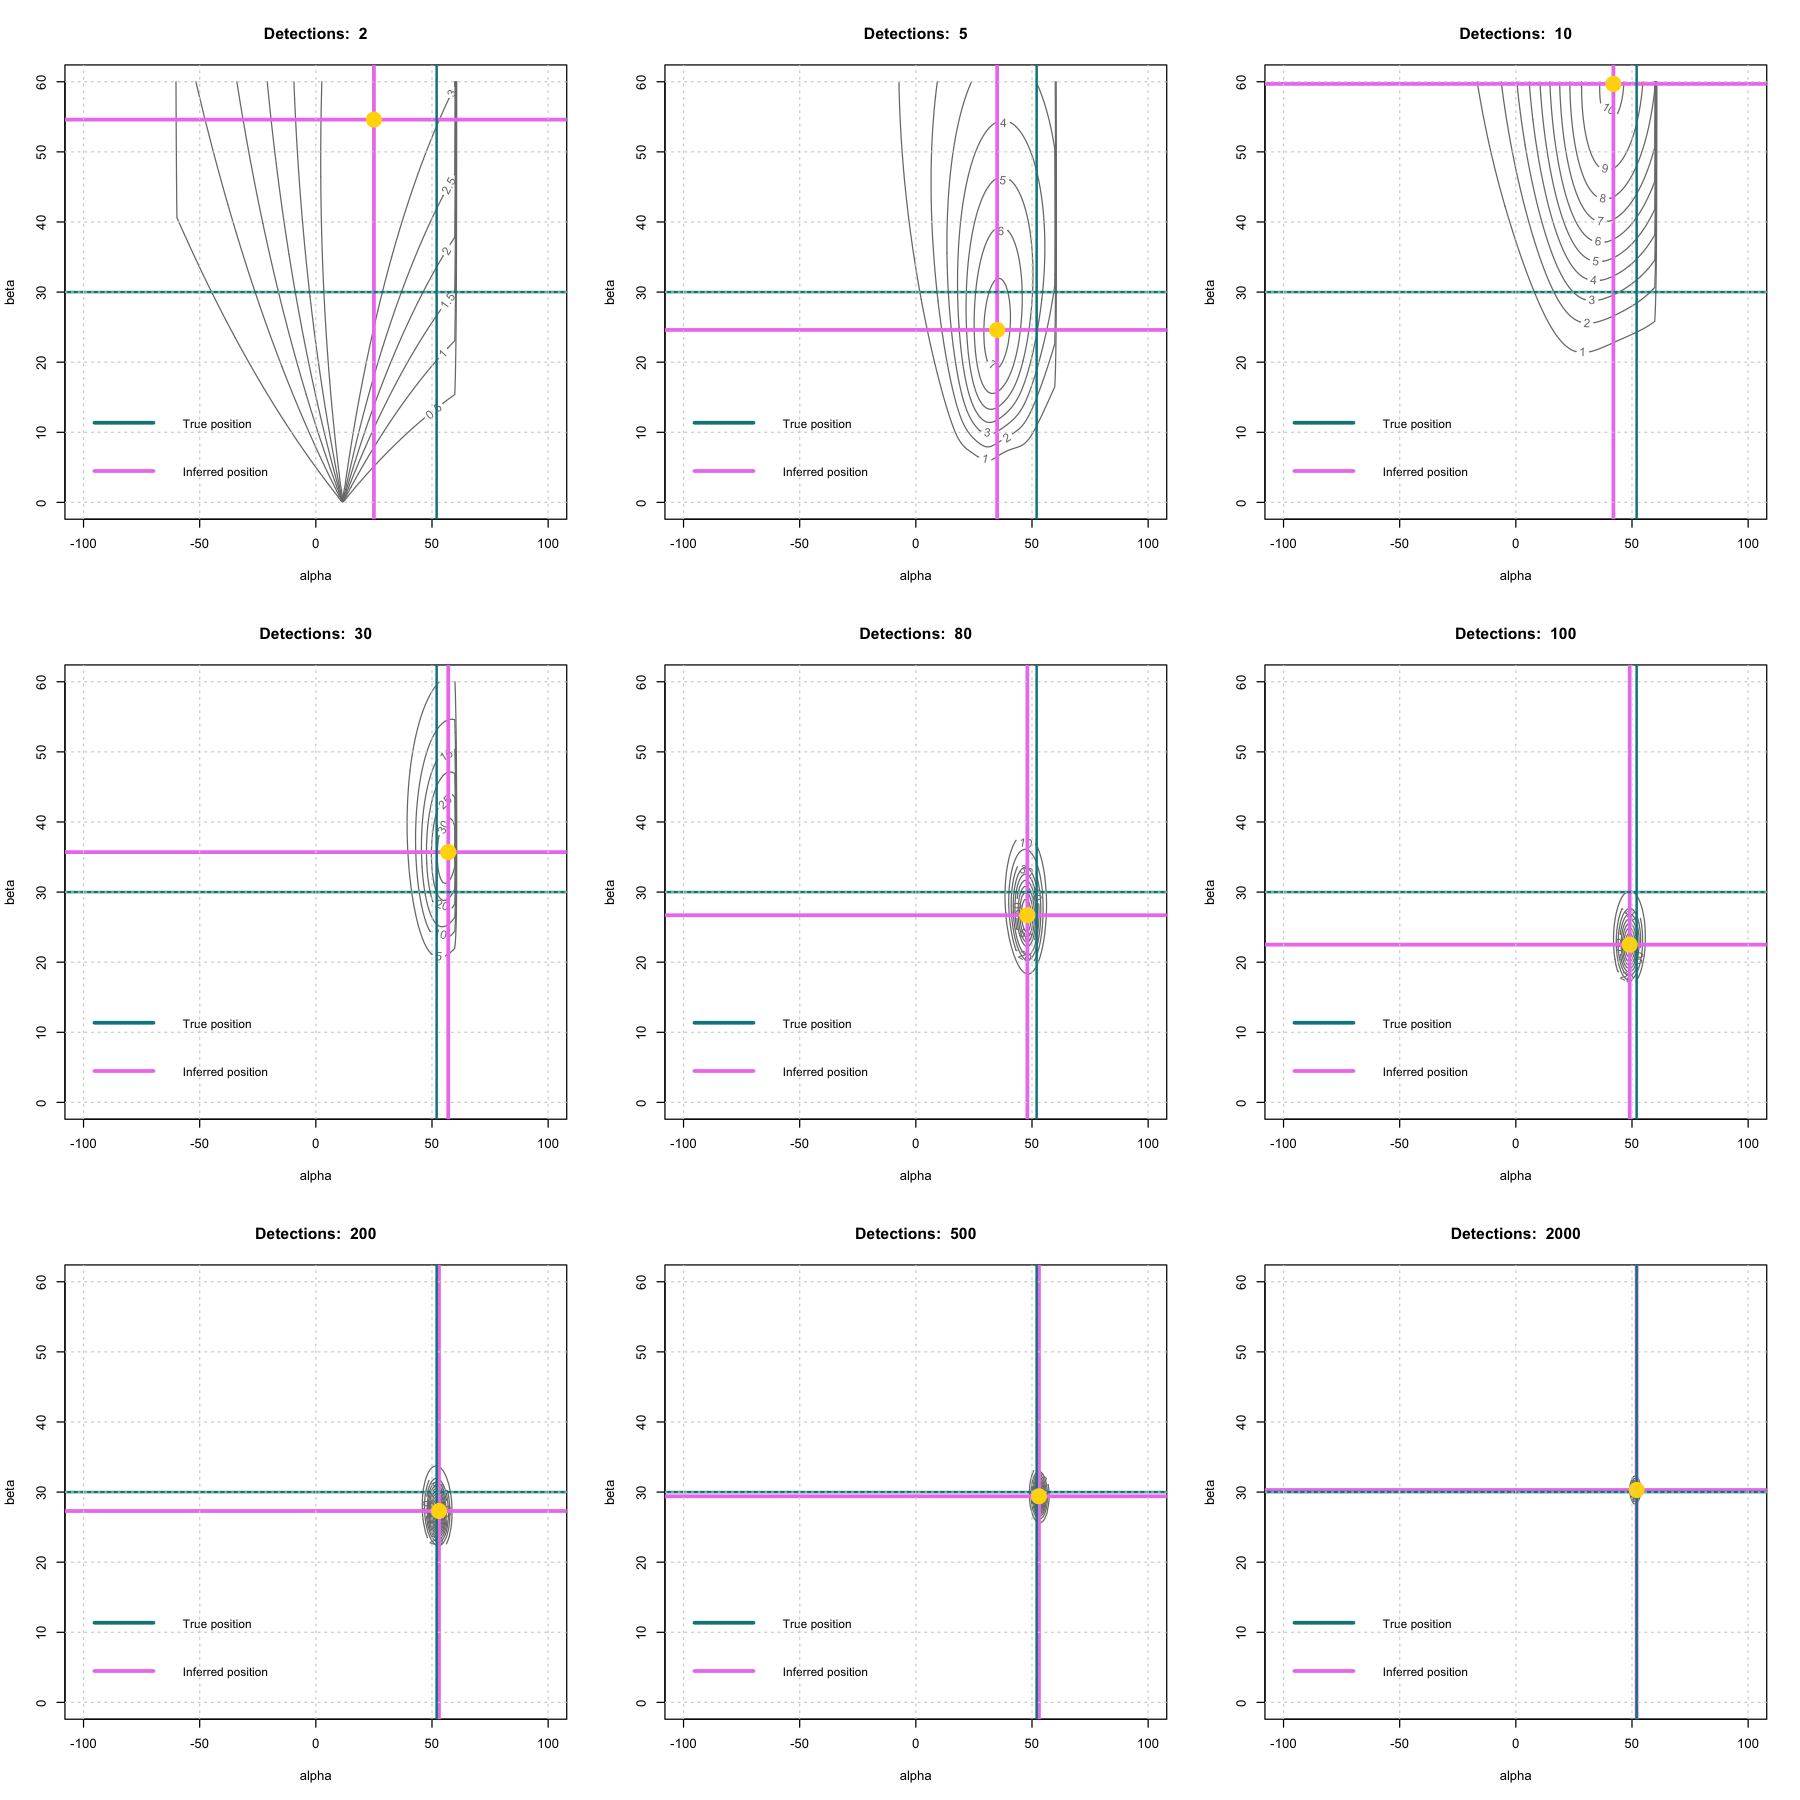

In [5]:
alpha.min = -100
alpha.max = +100
beta.min = 0
beta.max = 60

steps <- 200

alpha <- seq(alpha.min,alpha.max,length.out=steps)
beta  <- seq(beta.min, beta.max, length.out=steps)

#real position of the lighthouse
alpha.true = 52
beta.true = 30

log.likelihood <- function(alpha, beta, data){
    logL <- 0
    for(x in data){
        logL <- logL + log((1/pi)*(beta/(beta^2 + (x - alpha)^2)))
    }
    return(logL)
}

log.prior <- function(alpha, beta){
    return(log(dunif(alpha, -60, 60))+log(dunif(beta, beta.min, beta.max)))
}

log.post <- function(alpha, beta, data) {
    return(log.likelihood(alpha, beta ,data) + log.prior(alpha, beta))
}

n.detections <-c(2,5,10,30,80,100,200,500,2000)
options(repr.plot.width=15, repr.plot.height=15)


par(mfrow = c(3, 3))

for (n.detection in n.detections){
    
    #inference
    uniform.theta<- runif(n.detection, min=-pi/2, max=+pi/2)
    data.true    <- beta.true*tan(uniform.theta)+alpha.true

    p.log.post <- outer(alpha, beta, Vectorize(function(alpha,beta) log.post(alpha, beta, data.true)))
    p.log.post <- p.log.post-max(p.log.post)
    p.log.post.normalized <- exp(p.log.post)/(1/(steps^2) * sum(exp(p.log.post)))
    m.p.value =which(p.log.post.normalized== max(p.log.post.normalized), arr.ind = TRUE) 
    #plot
    contour(alpha, beta, p.log.post.normalized,col ='gray48',xlab='alpha', ylab='beta', main=paste('Detections: ', n.detection))
    abline(v=m.p.value[1]-100,col='violet',lwd=3)
    abline(h=m.p.value[2]*beta.max/steps,col='violet',lwd=3)
    abline(h=beta.true,lwd=2, col='turquoise4')
    abline(v=alpha.true,lwd=2, col='turquoise4')
    points(m.p.value[1]-100,m.p.value[2]*beta.max/steps,pch=19, col='gold', cex=2.5)

    legend('bottomleft',
           legend=c("True position",
                    "Inferred position"),
           col=c("turquoise4",
                 "violet"),
           lty=1:1,
           lwd=3:3,
           bty = "n",
           cex=0.9
          )
    grid()
}

## Exercise 3

### A

In [1]:
signal <- function(x, a, b, x0, w, t) {
    #function that generates the signal 
  t*(a*exp(-(x-x0)^2/(2*w^2)) + b)
}
log.post <- function(d, x, a, b, x0, w, t) {
    #function that returns the posterior
  if(a<0 || b <0) {return(-Inf)} # the effect of the prior
  sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}

OneRun <- function(w, A.true, B.true, Delta.t){
    
    #function that returns a run of the experiment for:
    #some resolution = w;
    #amplitude/background ratio = A.true/B.true;
    #exposure time = Delta.t
      
    alim <- c(0.0, A.true+min(c(2, A.true/2)))
    blim <- c(0.5, B.true+min(c(2, B.true/2)))
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    #variables setup and signal generation
    x0<-0
    
    set.seed(205)
    xdat <- seq(from=-7*w, to=7*w, by=0.5*w)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior, z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        } 
    }
    z <- z - max(z) #set maximum to zero
    
    #marginalization
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    par(mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(4,4,3,2), oma=0.1*c(1,1,1,1), cex.lab=1.5, cex.main=1.5)

    #plot data
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="Signal+Background counts", type="l", col="grey", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    par(new=TRUE)
    plot(xdat , ddat , type='s',col='firebrick3',lwd=2, xlab="", ylab="", xlim=range(xplot), ylim=range(c(splot, ddat)))
    
    # Plot unnormalized 2D posterior as contours. 
    contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2, xlab="Amplitude, A", ylab="Background, B", main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    abline(v=A.true,h=B.true,col="grey")
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="Background, B", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(b, p_b_aD, lwd=2, lty=2) 
    abline(v=B.true, col="grey")
    plot(a, p_a_D, xlab="Amplitude, A", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(a, p_a_bD, lwd=2, lty=2) 
    abline(v=A.true, col="grey")

}

OneRun.w.fixed <- function(w, A.true, B.true, Delta.t){
    
    #function that returns a run of the experiment for:
    #some resolution = w;
    #amplitude/background ratio = A.true/B.true;
    #exposure time = Delta.t
      
    alim <- c(0.0, A.true+min(c(2, A.true/2)))
    blim <- c(0.5, B.true+min(c(2, B.true/2)))
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp), to=1-1/(2*Nsamp), by=1/Nsamp) 
    delta_a <- diff(alim)/Nsamp 
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid 
    b <- blim[1] + diff(blim)*uniGrid
    
    #variables setup and signal generation
    x0<-0
    
    set.seed(205)
    xdat <- seq(from=-7, to=7, by=0.5)
    s.true <- signal(xdat, A.true, B.true, x0, w, Delta.t) 
    ddat <- rpois(length(s.true), s.true)
    
    # Compute log unnormalized posterior, z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix(data=NA, nrow=length(a), ncol=length(b)) 
    for(j in 1:length(a)) {
        for(k in 1:length(b)) {
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, w, Delta.t)
        } 
    }
    z <- z - max(z) #set maximum to zero
    
    #marginalization
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum) 
    p_b_D <- p_b_D/(delta_b*sum(p_b_D))
    
    p_a_bD <- exp(Vectorize(log.post, "a")(ddat, xdat, a, B.true, x0, w, Delta.t))
    p_a_bD <- p_a_bD/(delta_a*sum(p_a_bD))
    p_b_aD <- exp(Vectorize(log.post, "b")(ddat, xdat, A.true, b, x0, w, Delta.t))
    p_b_aD <- p_b_aD/(delta_b*sum(p_b_aD))
    
    par(mfrow=c(1,4), mgp=c(2,0.8,0), mar=c(4,4,3,2), oma=0.1*c(1,1,1,1), cex.lab=1.5, cex.main=1.5)

    #plot data
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w) 
    splot <- signal(xplot, A.true, B.true, x0, w, Delta.t) 
    plot(xplot, splot, ylim=range(c(splot, ddat)), xlab="x", ylab="Signal+Background counts", type="l", col="grey", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    par(new=TRUE)
    plot(xdat , ddat , type='s',col='firebrick3',lwd=2, xlab="", ylab="", xlim=range(xplot), ylim=range(c(splot, ddat)))
    
    # Plot unnormalized 2D posterior as contours. 
    contour(a, b, exp(z),nlevels = 5,labcex = 0.5,lwd = 2, xlab="Amplitude, A", ylab="Background, B", main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    abline(v=A.true,h=B.true,col="grey")
    
    # Plot the 1D marginalized posteriors
    plot(b, p_b_D, xlab="Background, B", yaxs="i",ylim=1.05*c(0,max(p_b_D, p_b_aD)), ylab="P(B|D) and P(B|A,D)",type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(b, p_b_aD, lwd=2, lty=2) 
    abline(v=B.true, col="grey")
    plot(a, p_a_D, xlab="Amplitude, A", yaxs="i",ylim=1.05*c(0,max(p_a_D, p_a_bD)), ylab="P(A|D) and P(A|B,D)", type="l", lwd=2, main=paste(' w=',w,' A/R=',A.true,' dt=',Delta.t))
    lines(a, p_a_bD, lwd=2, lty=2) 
    abline(v=A.true, col="grey")
}

### Results varying the detector resolution

Here I use the function *OneRun.w.fixed* since I don't want to rescale the x-axis

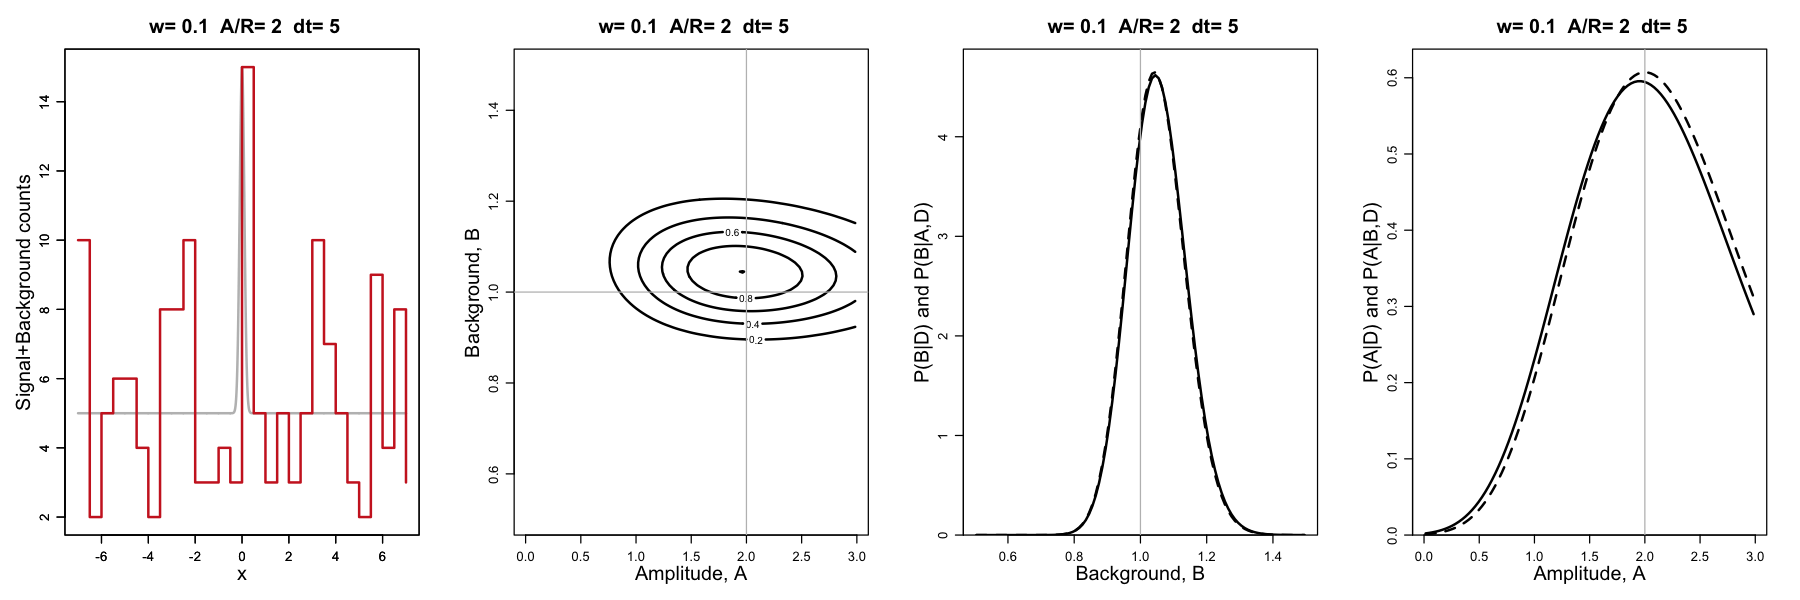

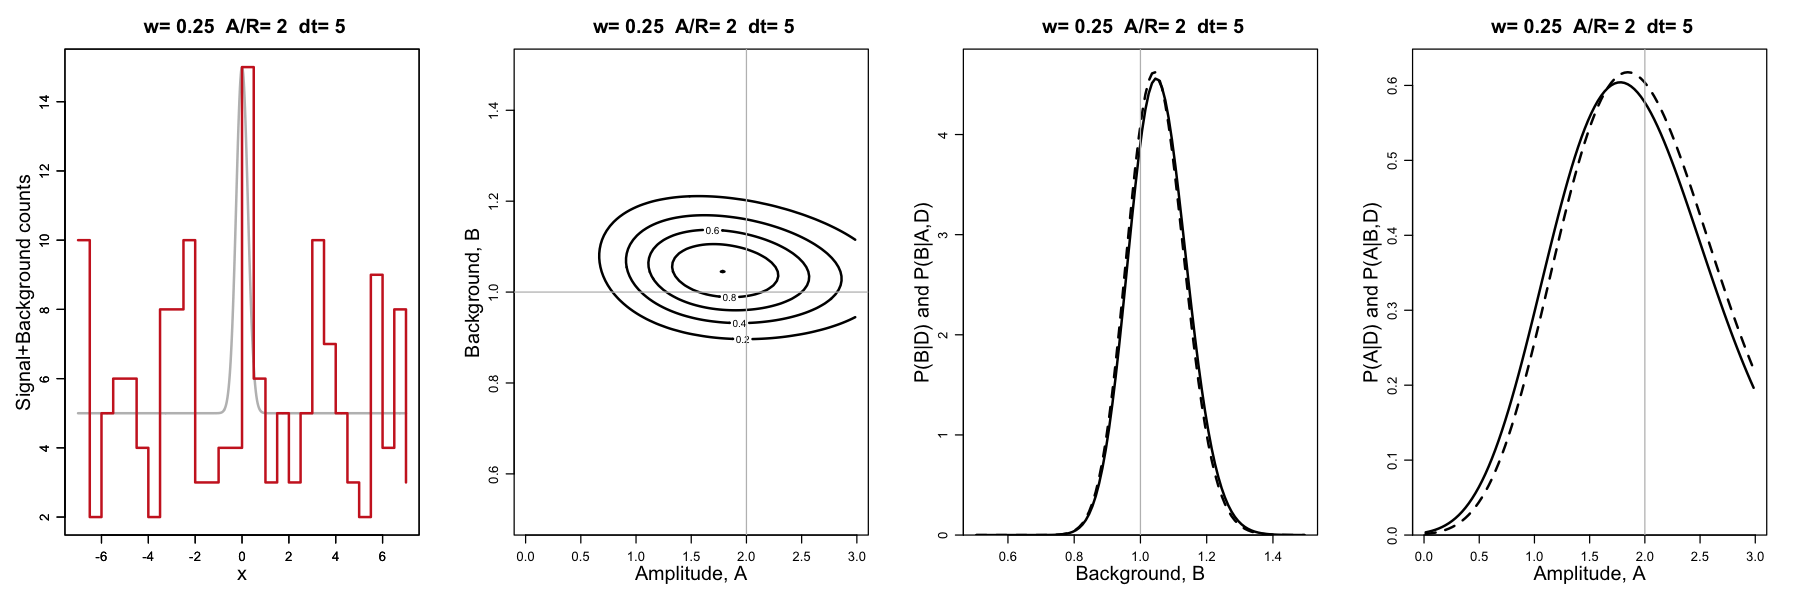

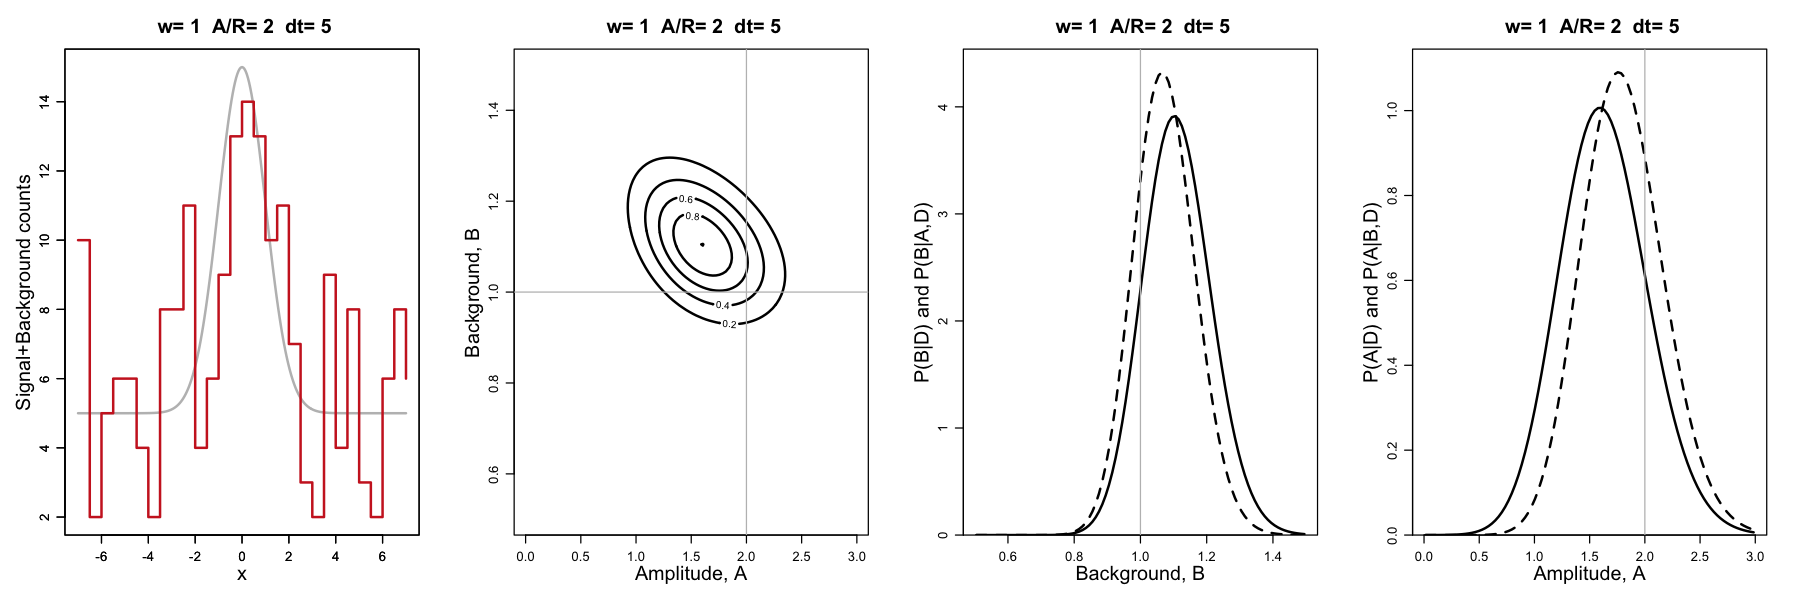

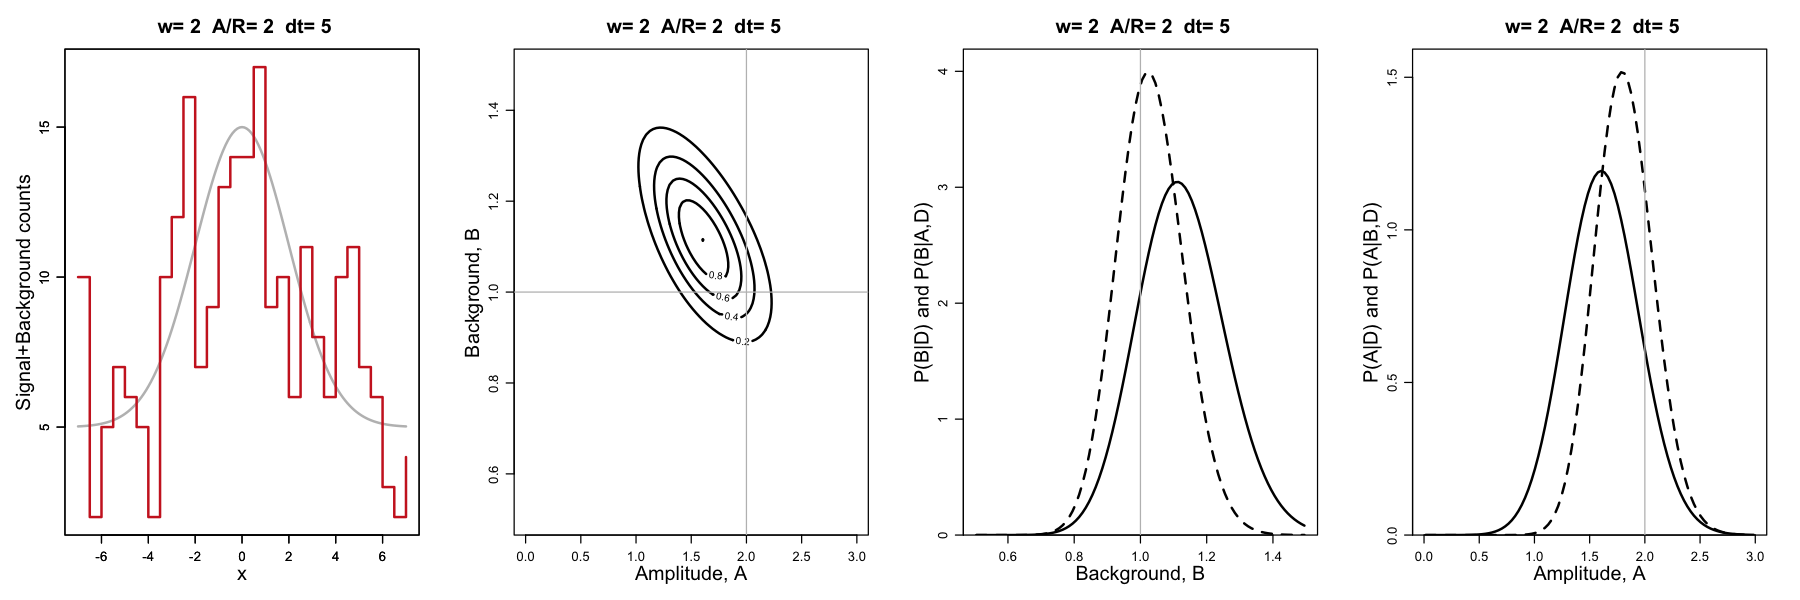

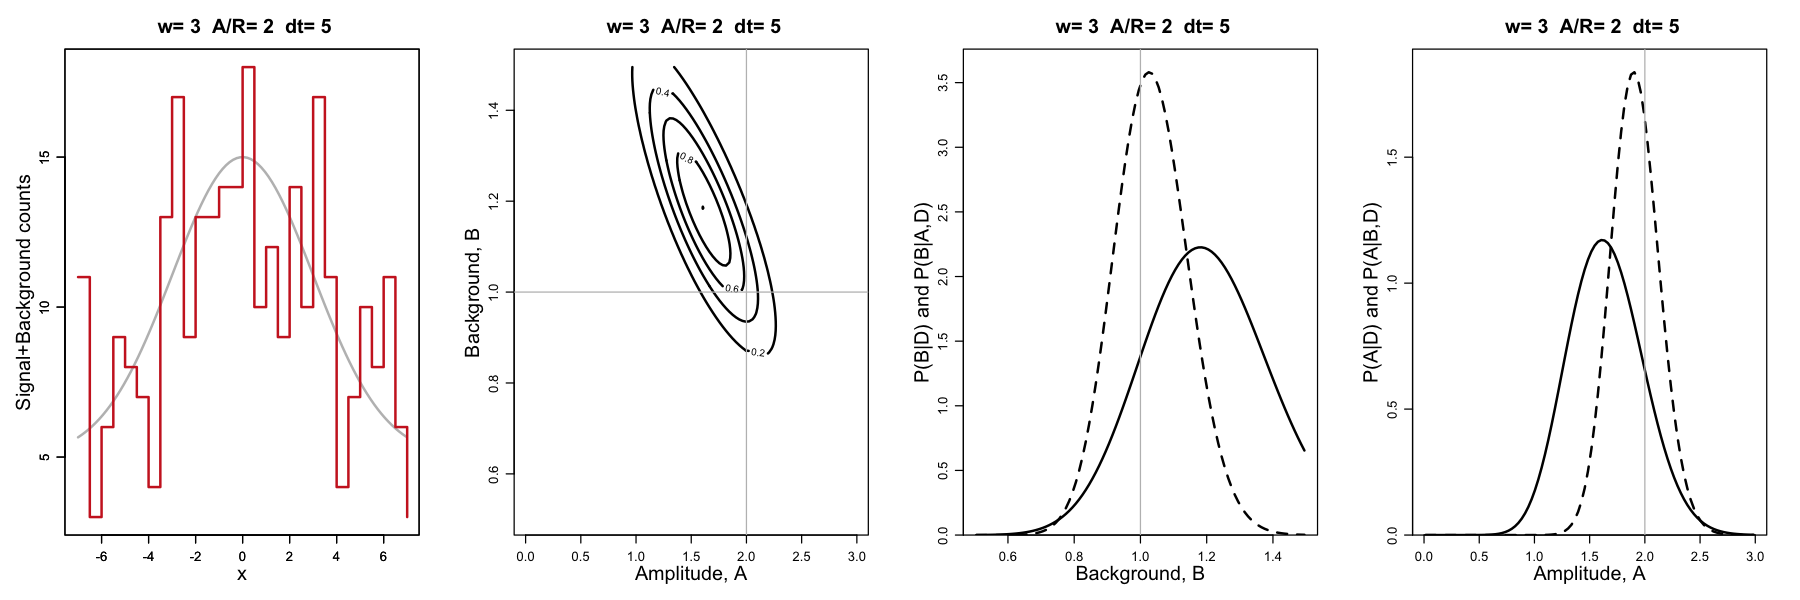

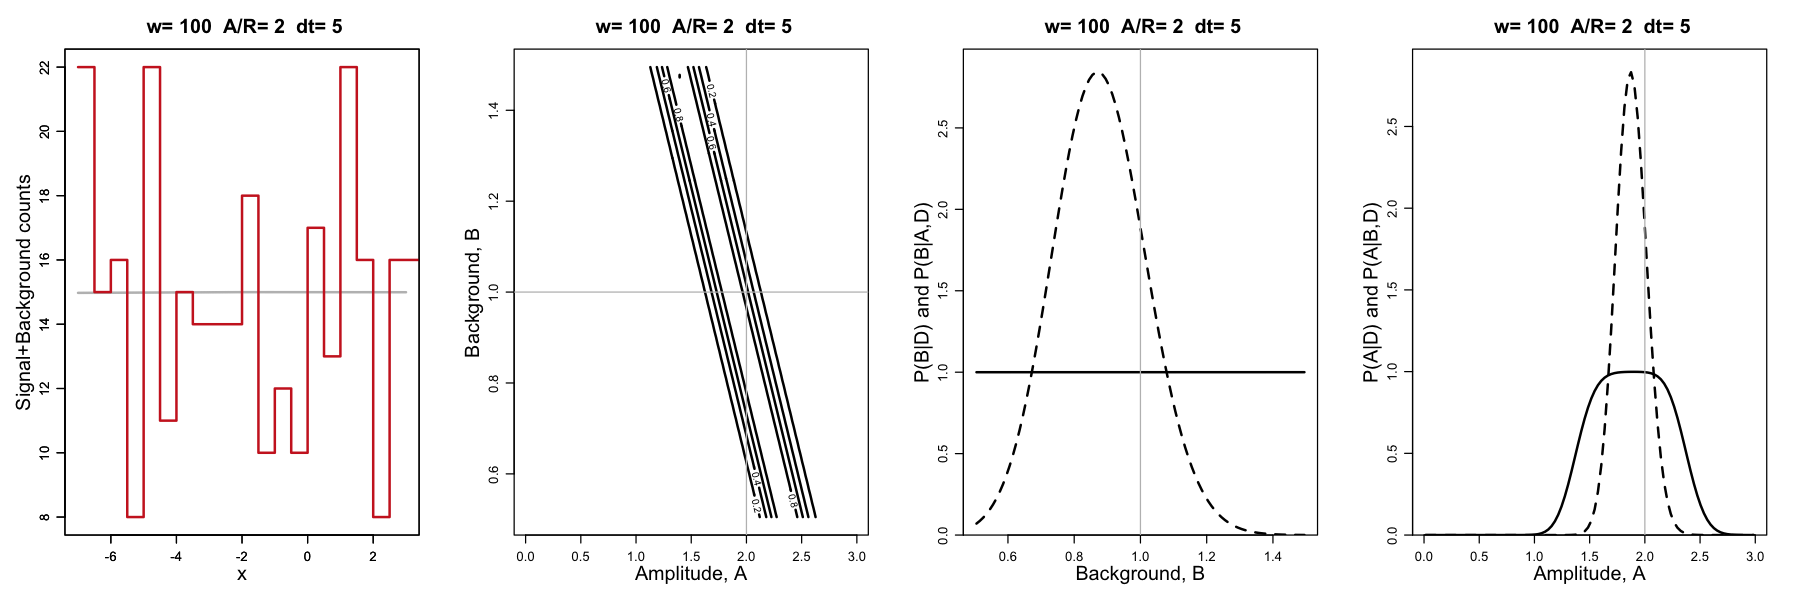

In [2]:
sampling.resolutions <- c(0.1, 0.25, 1, 2, 3, 100)
options(repr.plot.width=15, repr.plot.height=5)

for (w in sampling.resolutions){
 OneRun.w.fixed(w, A.true=2, B.true=1, Delta.t=5)   
} 

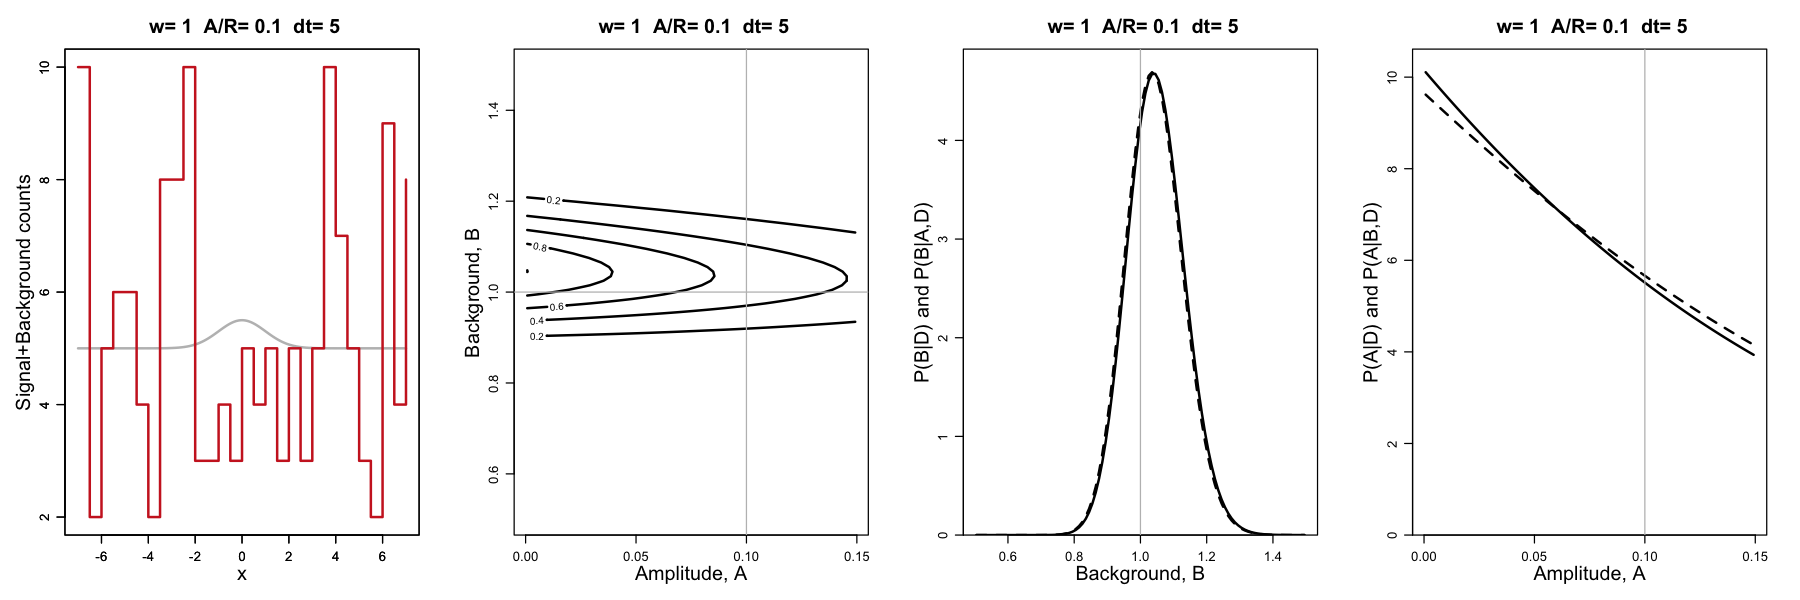

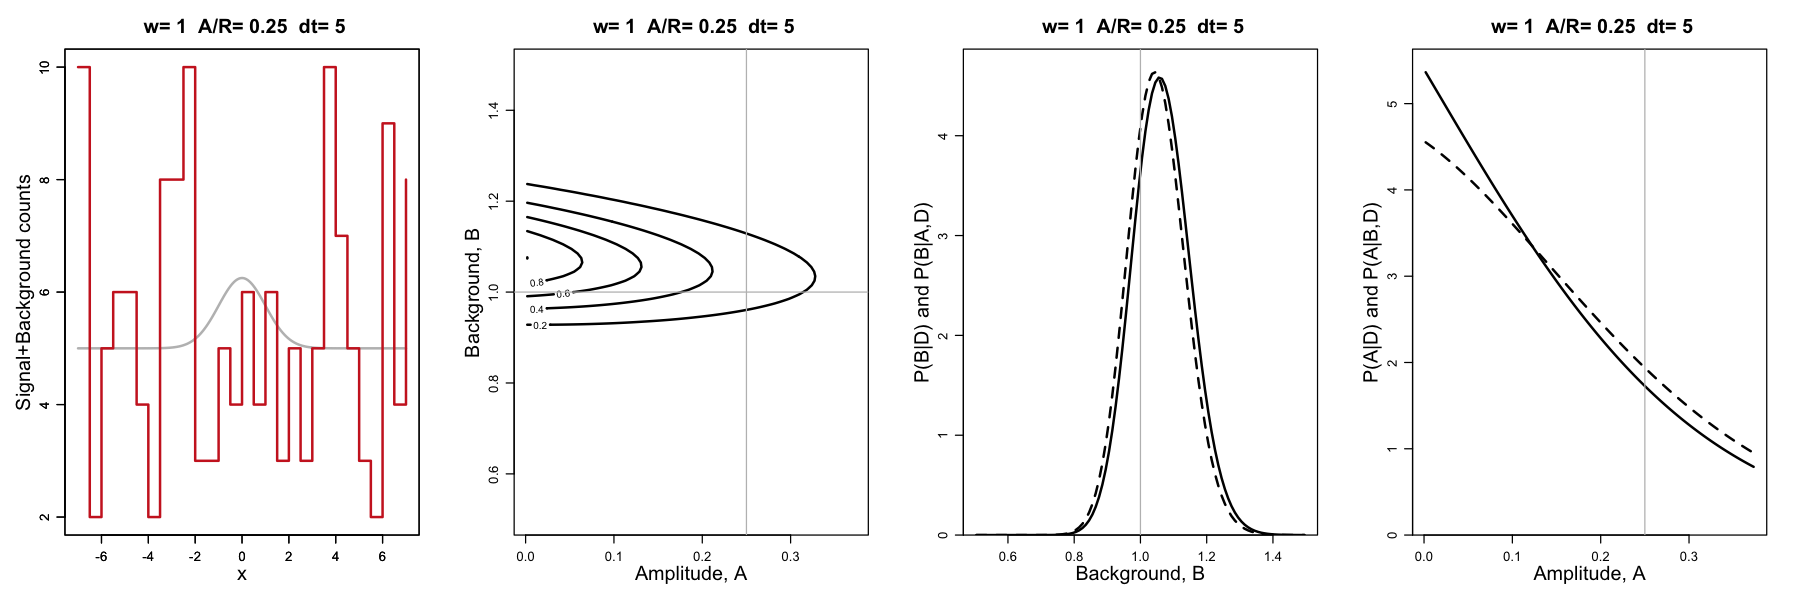

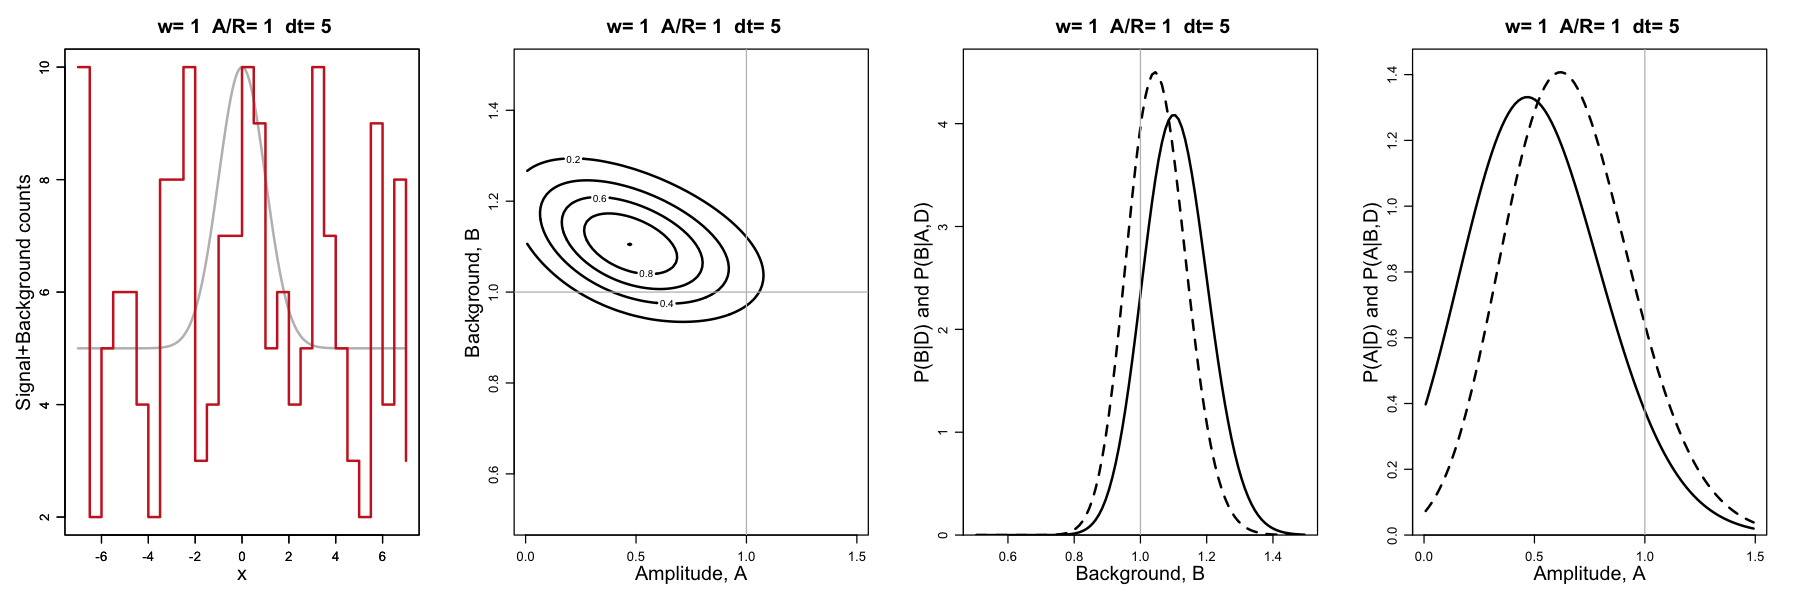

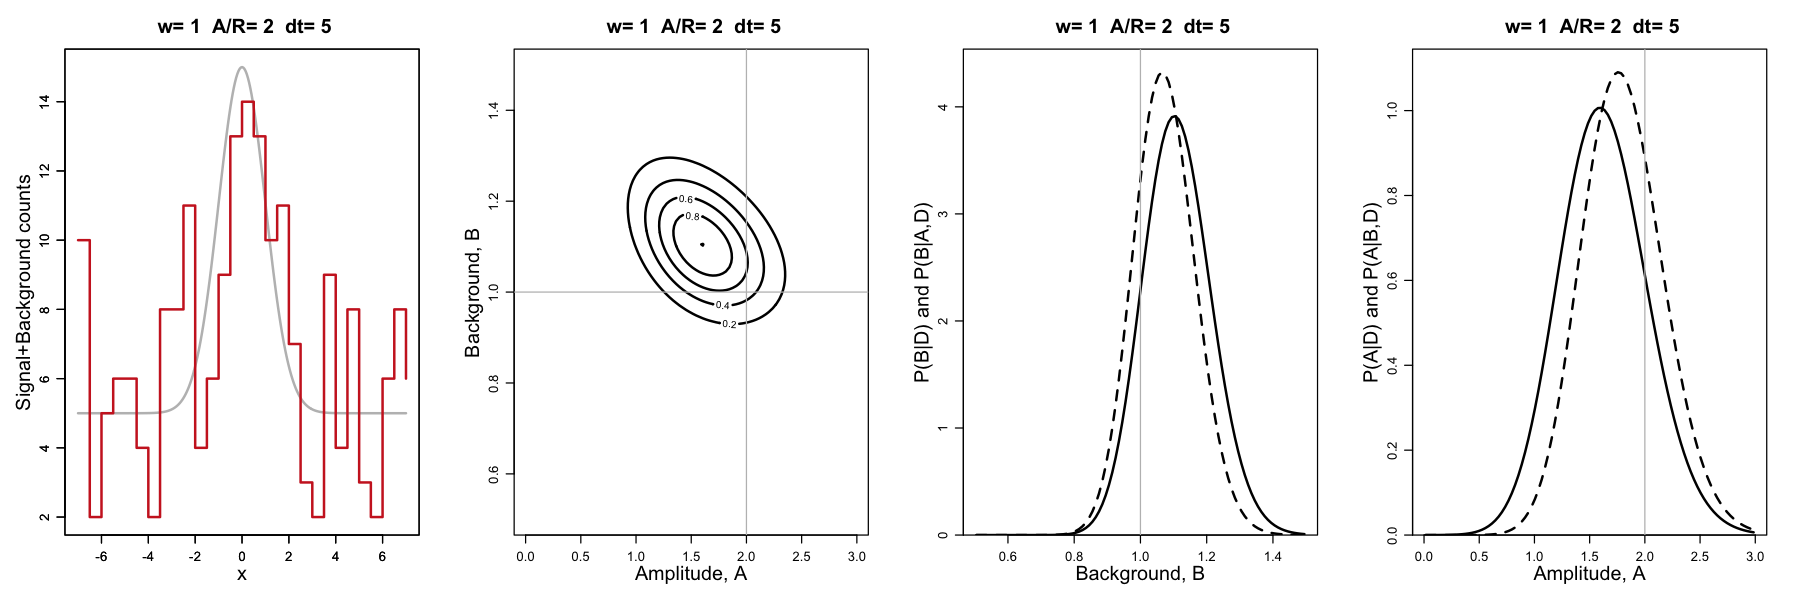

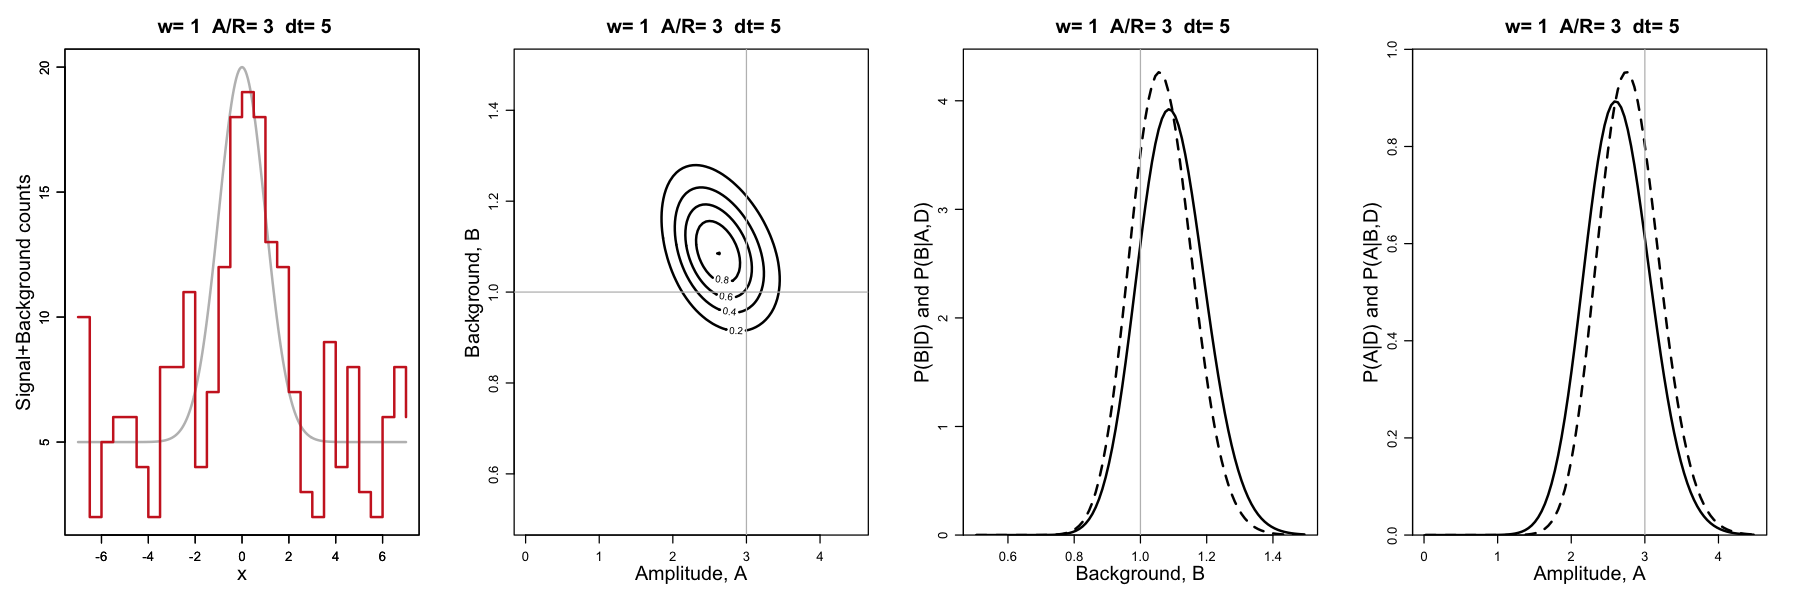

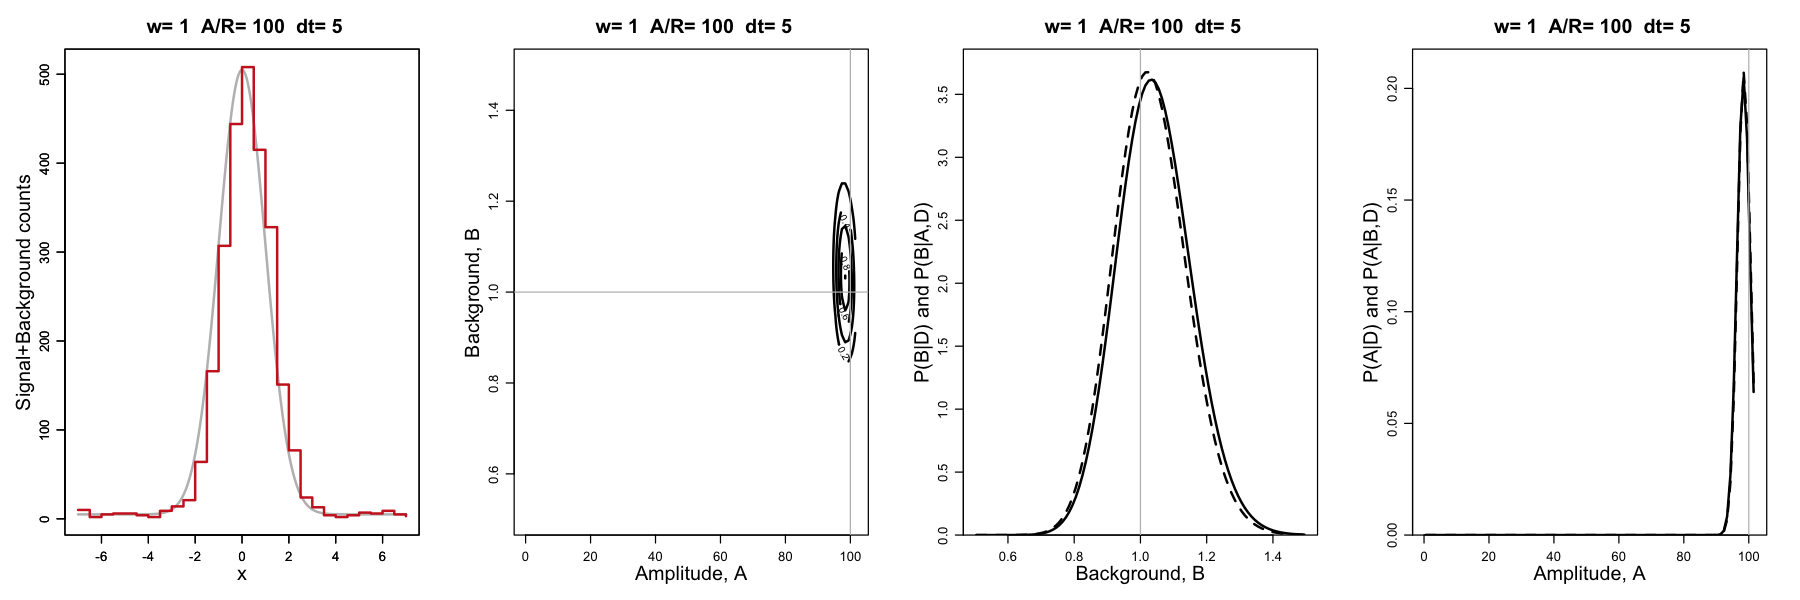

In [12]:
A.trues <- c(0.1, 0.25, 1, 2, 3, 100)
options(repr.plot.width=15, repr.plot.height=5)
for (at in A.trues) OneRun(w=1,at,B.true=1, Delta.t=5)

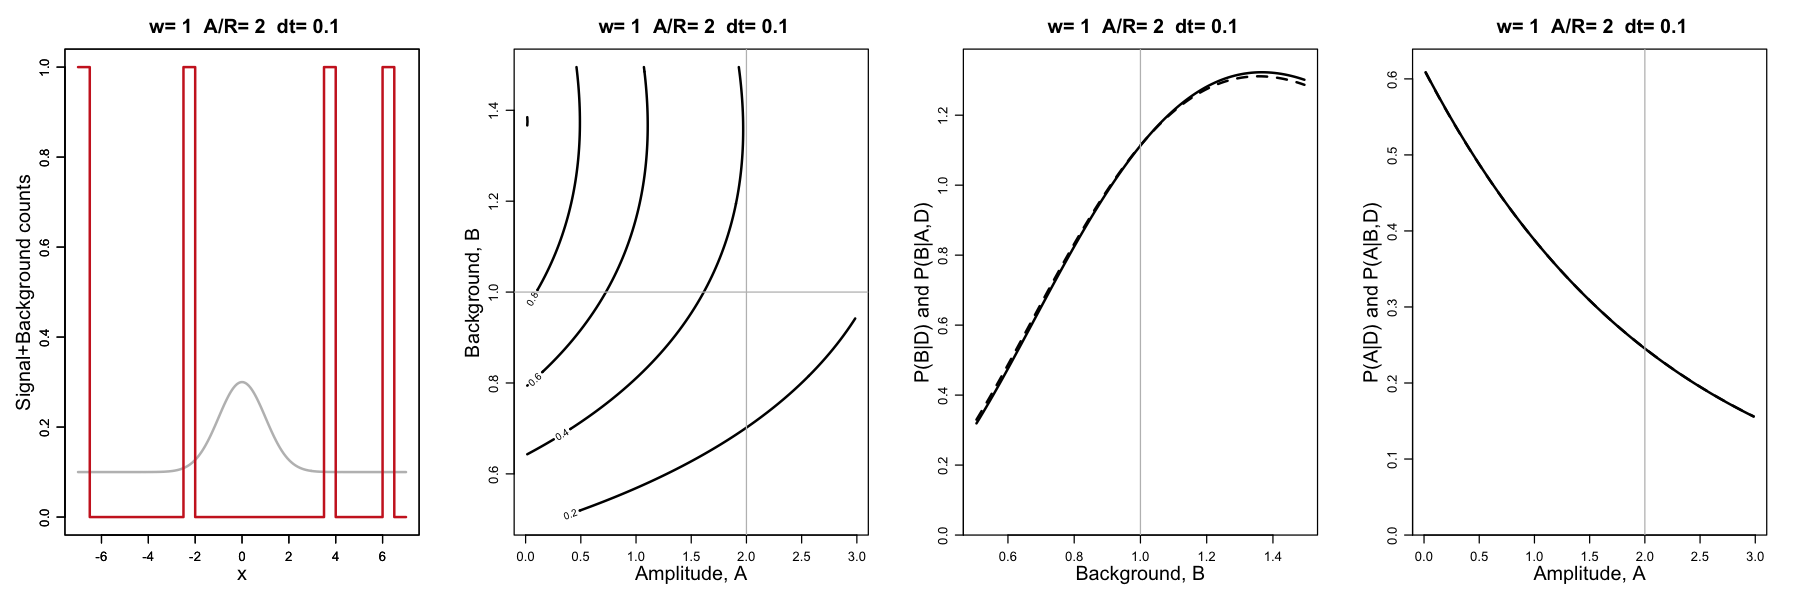

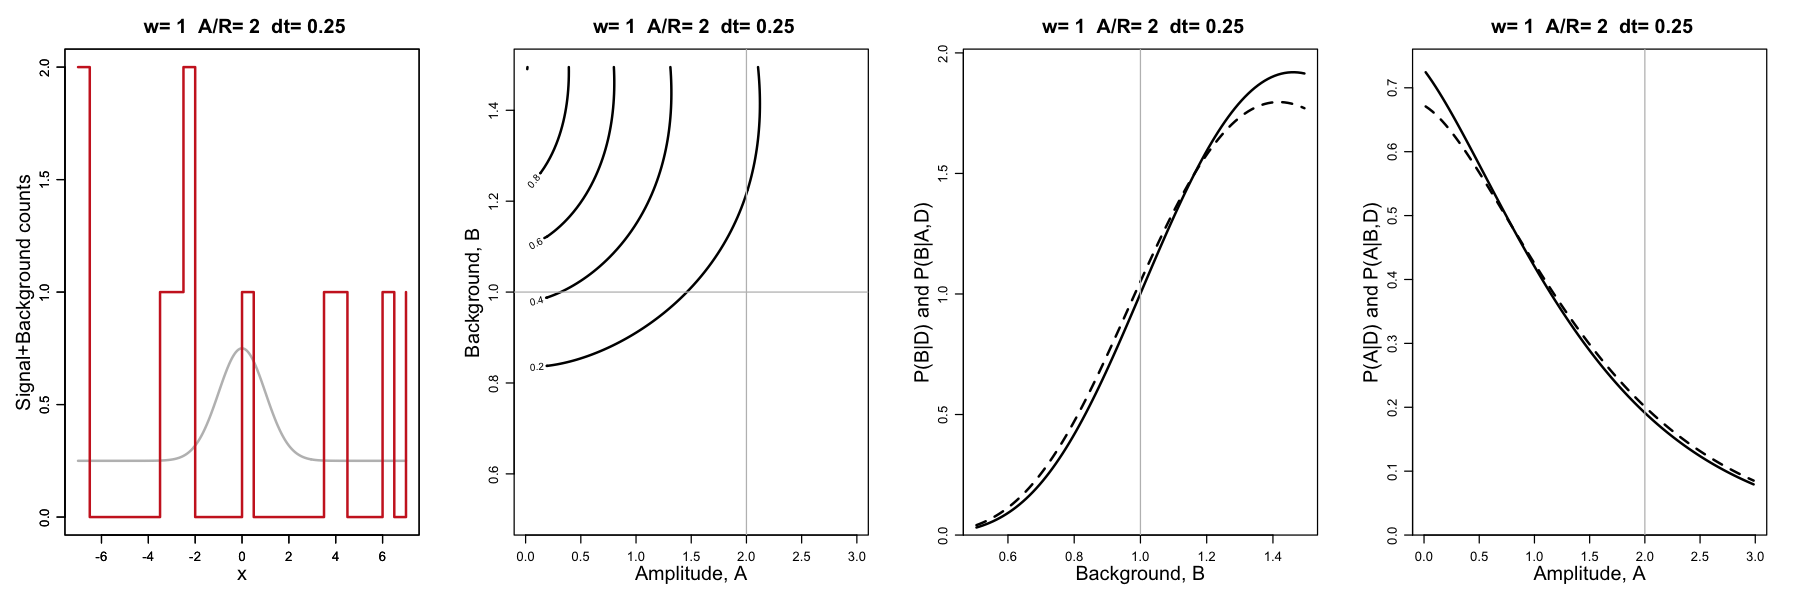

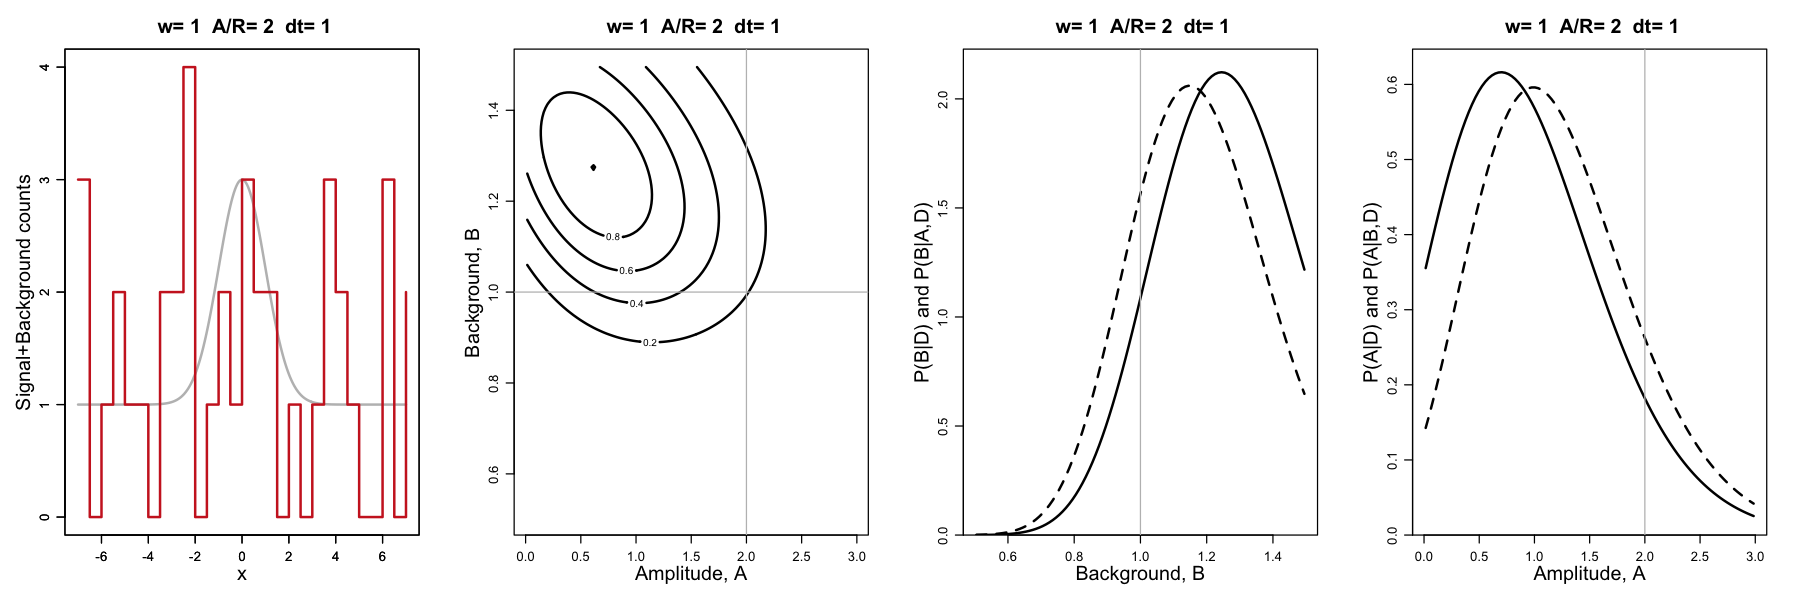

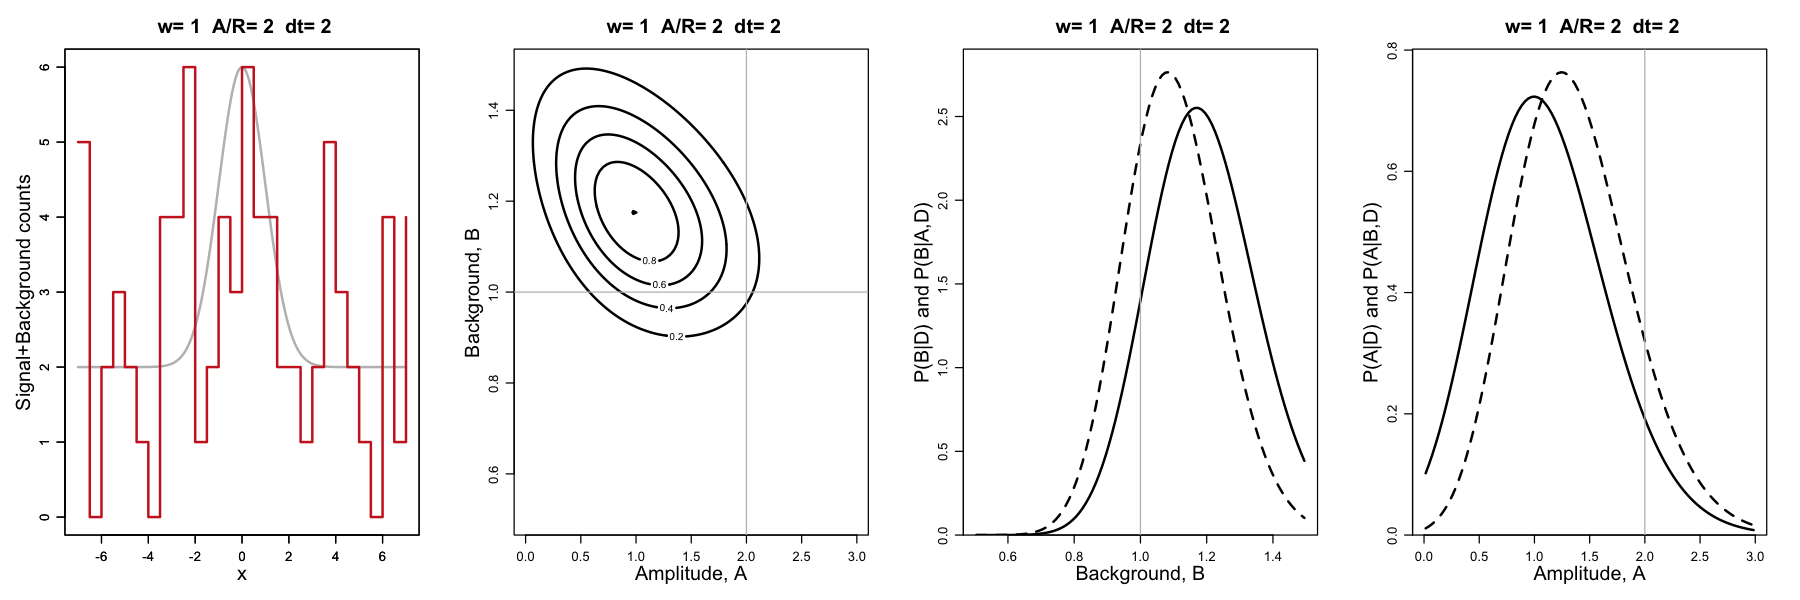

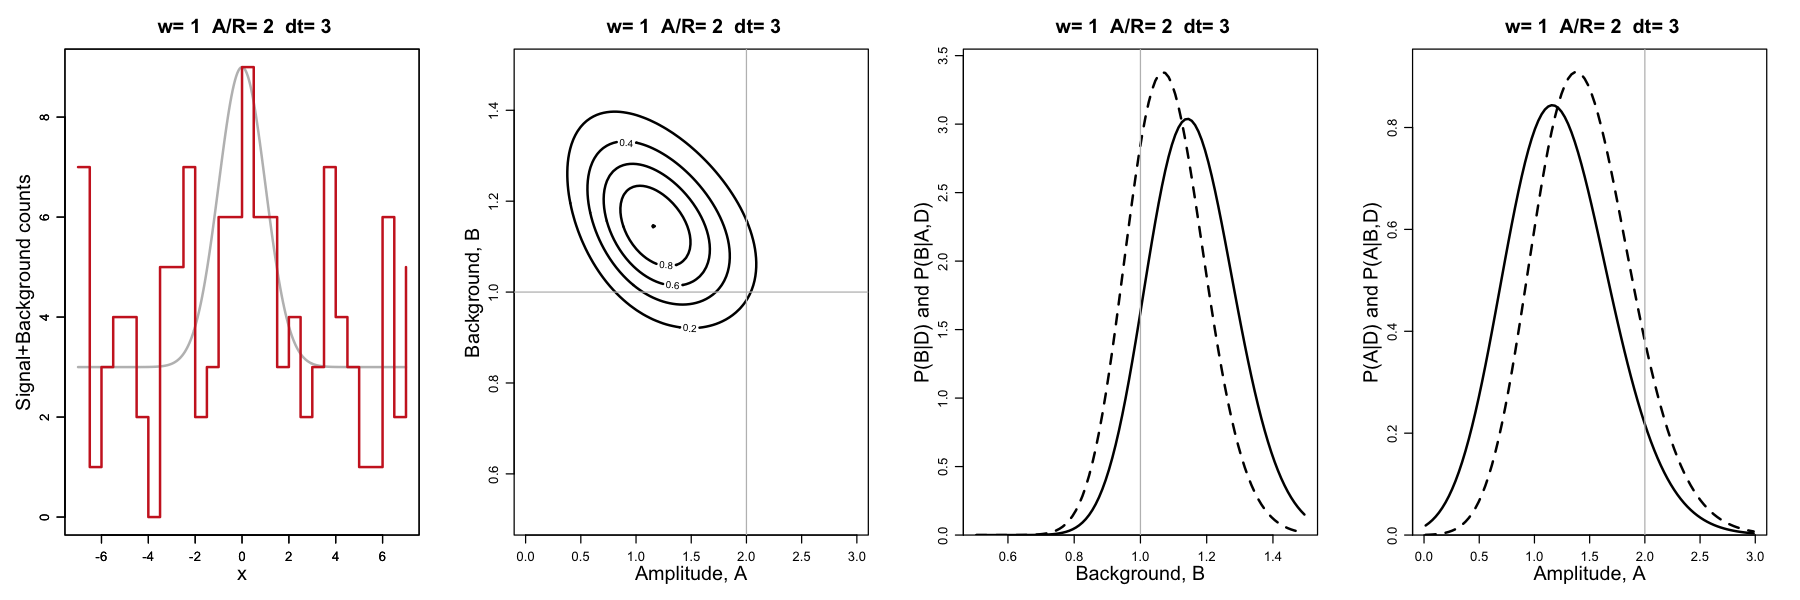

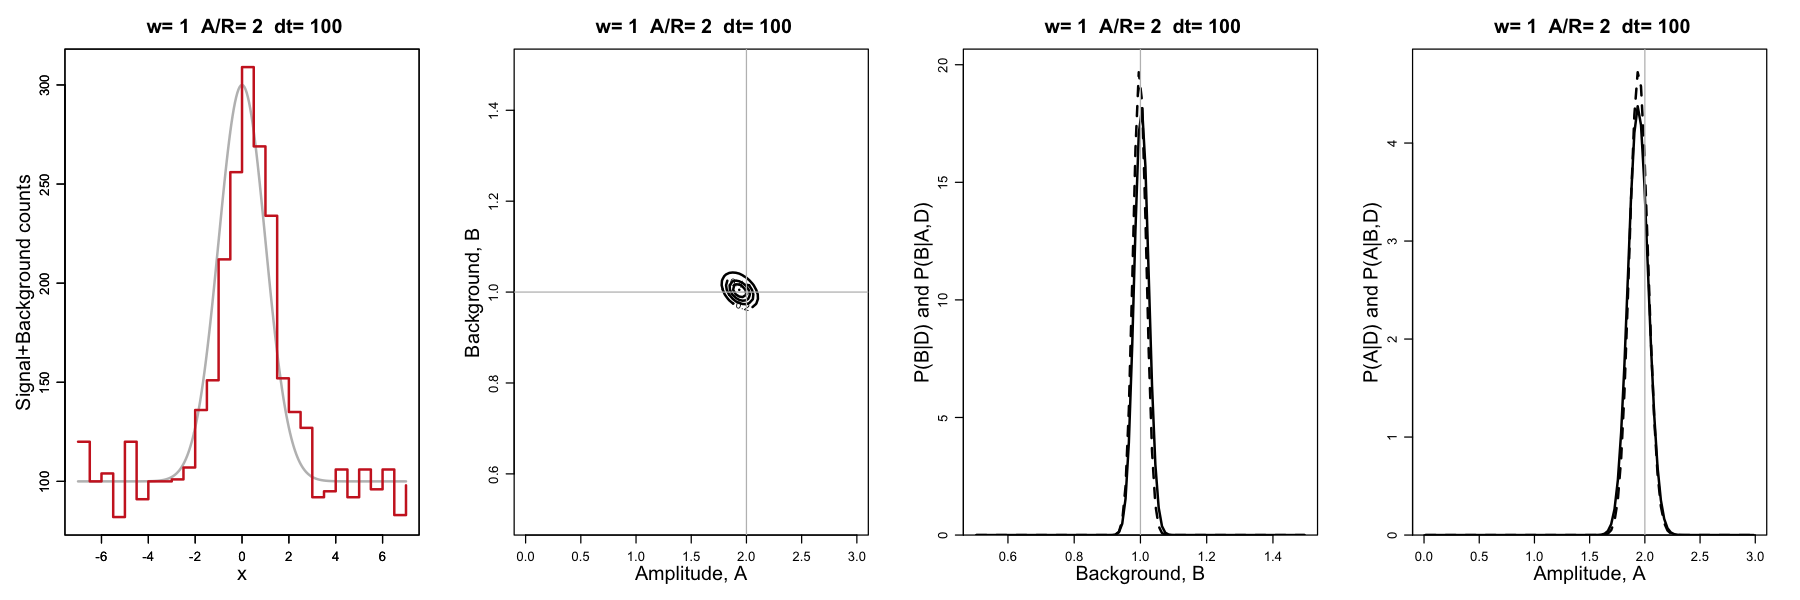

In [13]:
times <- c(0.1, 0.25, 1, 2, 3, 100)
options(repr.plot.width=15, repr.plot.height=5)
for (Delta.t in times) OneRun(w=1, A.true=2, B.true=1, Delta.t)   

larger exposures implies more collected photons and smaller exposures a decrease in accuracy and precision